## Predict if customer will have a credit balance or not
### See if we can grant a loan to customer or not

In [1]:
import numpy as np
import pandas as pd

#import dataset and separate columns at ;
df1 = pd.read_csv('bank-full.csv', delimiter = ';')

In [2]:
df1


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
#check for null values
df1.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [40]:
#save as new dataset 
df1 . to_csv("bank-full-dataset.csv", index=False)

In [4]:
dfn = pd.read_csv('bank-full-dataset.csv')

In [5]:
dfn

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Clean the dataset

In [6]:
#drop columns with too many 'unknown' values
#drop contact and poutcome

dfn.drop(['contact', 'poutcome'], axis='columns', inplace=True)

In [7]:
##after doing filter based feature selection in Azure Machine Learning Studio, the highest 7 features were selected
#drop columns that aren't required

dfn.drop([ 'marital', 'education', 'housing', 'duration', 'campaign'], axis='columns', inplace=True)

In [8]:
#rearrange column here

dfn_reorder = dfn[["age" , "job" ,  "balance" , "loan" , "day" , "month" , "pdays" , "previous" , "y" , "default"]] 
#dfn_reorder.to_csv('bank-full-dataset-reordered.csv', index=False)

In [9]:
dfn_reorder

,age,job,balance,loan,day,month,pdays,previous,y,default
0,58,management,2143,no,5,may,-1,0,no,no
1,44,technician,29,no,5,may,-1,0,no,no
2,33,entrepreneur,2,yes,5,may,-1,0,no,no
3,47,blue-collar,1506,no,5,may,-1,0,no,no
4,33,unknown,1,no,5,may,-1,0,no,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,825,no,17,nov,-1,0,yes,no
45207,71,retired,1729,no,17,nov,-1,0,yes,no
45208,72,retired,5715,no,17,nov,184,3,yes,no
45209,57,blue-collar,668,no,17,nov,-1,0,no,no


In [10]:
dfn_reorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   job       45211 non-null  object
 2   balance   45211 non-null  int64 
 3   loan      45211 non-null  object
 4   day       45211 non-null  int64 
 5   month     45211 non-null  object
 6   pdays     45211 non-null  int64 
 7   previous  45211 non-null  int64 
 8   y         45211 non-null  object
 9   default   45211 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.4+ MB


In [11]:
#change prediction column name

dfn_reorder.rename(columns={'y':'ifCreatedAccount'},inplace=True)
dfn_reorder.rename(columns={'default':'ifCreditExists'},inplace=True)

dfn_reorder

,age,job,balance,loan,day,month,pdays,previous,ifCreatedAccount,ifCreditExists
0,58,management,2143,no,5,may,-1,0,no,no
1,44,technician,29,no,5,may,-1,0,no,no
2,33,entrepreneur,2,yes,5,may,-1,0,no,no
3,47,blue-collar,1506,no,5,may,-1,0,no,no
4,33,unknown,1,no,5,may,-1,0,no,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,825,no,17,nov,-1,0,yes,no
45207,71,retired,1729,no,17,nov,-1,0,yes,no
45208,72,retired,5715,no,17,nov,184,3,yes,no
45209,57,blue-collar,668,no,17,nov,-1,0,no,no


In [12]:
#change yes = 1 no = 0
#give values to each job and each month from 1 to 12

dfn_reorder['ifCreatedAccount'] = dfn_reorder['ifCreatedAccount'].map({'yes': 1, 'no': 0})
dfn_reorder['ifCreditExists'] = dfn_reorder['ifCreditExists'].map({'yes': 1, 'no': 0})
dfn_reorder['loan'] = dfn_reorder['loan'].map({'yes': 1, 'no': 0})
dfn_reorder['month'] = dfn_reorder['month'].map({'jan': 1, 'feb': 2,'mar':3,'apr': 4,'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9,'oct':10,'nov': 11,'dec': 12})
dfn_reorder['job'] = dfn_reorder['job'].map({'blue-collar': 1, 'management': 2,'technician':3,'admin.': 4,'services': 5, 'retired': 6, 'self-employed': 7, 'entrepreneur': 8, 'unemployed': 9,'housemaid':10,'student': 11,'unknown': 12})

dfn_reorder

,age,job,balance,loan,day,month,pdays,previous,ifCreatedAccount,ifCreditExists
0,58,2,2143,0,5,5,-1,0,0,0
1,44,3,29,0,5,5,-1,0,0,0
2,33,8,2,1,5,5,-1,0,0,0
3,47,1,1506,0,5,5,-1,0,0,0
4,33,12,1,0,5,5,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,0,17,11,-1,0,1,0
45207,71,6,1729,0,17,11,-1,0,1,0
45208,72,6,5715,0,17,11,184,3,1,0
45209,57,1,668,0,17,11,-1,0,0,0


In [13]:
#final dataset after cleaning

dfn_reorder . to_csv("cleanedBankDatasetGLoan.csv", index=False)

In [14]:
dataframe = pd.read_csv('cleanedBankDatasetGLoan.csv')
dataframe

,age,job,balance,loan,day,month,pdays,previous,ifCreatedAccount,ifCreditExists
0,58,2,2143,0,5,5,-1,0,0,0
1,44,3,29,0,5,5,-1,0,0,0
2,33,8,2,1,5,5,-1,0,0,0
3,47,1,1506,0,5,5,-1,0,0,0
4,33,12,1,0,5,5,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,0,17,11,-1,0,1,0
45207,71,6,1729,0,17,11,-1,0,1,0
45208,72,6,5715,0,17,11,184,3,1,0
45209,57,1,668,0,17,11,-1,0,0,0


### Creating models 

In [15]:
newmDF = dataframe.sample(n = 10000, random_state = 2)

In [16]:
### Independent and Dependent features
X=newmDF.iloc[:,:-1]
y=newmDF.iloc[:,-1]

In [17]:
X.head()

,age,job,balance,loan,day,month,pdays,previous,ifCreatedAccount
28127,30,2,370,0,29,1,246,1,0
20256,56,10,1780,0,11,8,-1,0,0
6285,40,2,290,0,27,5,-1,0,0
198,43,2,400,0,5,5,-1,0,0
2417,28,1,52,0,13,5,-1,0,0


In [18]:
y.tail()

6596     0
7347     0
13433    0
39288    0
23728    0
Name: ifCreditExists, dtype: int64

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier()
RFclassifier.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
# Prediction
y_pred=RFclassifier.predict(X_test)

In [23]:
# Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.985

In [24]:
# Create a Pickle file using serialization for Random Forest Classifier
import pickle
pickle_out = open("Cred-RFclassifier.pkl","wb")
pickle.dump(RFclassifier, pickle_out)
pickle_out.close()

In [25]:
#Implement Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
DTy_pred=DTclassifier.predict(X_test)

In [27]:
#checking accuracy
DTscore=accuracy_score(y_test,DTy_pred)
DTscore

0.9673333333333334

In [28]:
DT_pickle_out = open("Cred-DTClassifier.pkl","wb")
pickle.dump(DTclassifier, DT_pickle_out)
DT_pickle_out.close()

In [66]:
#Implement Gaussian Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

NBclassifier = GaussianNB()
NBclassifier.fit(X_train,y_train)


GaussianNB()

In [30]:
NBy_pred=NBclassifier.predict(X_test)

In [31]:
#checking accuracy
NBscore=accuracy_score(y_test,NBy_pred)
NBscore

0.979

In [32]:
NB_pickle_out = open("Cred-NBclassifier.pkl","wb")
pickle.dump(NBclassifier, NB_pickle_out)
NB_pickle_out.close()

In [29]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
KNNy_pred=KNNclassifier.predict(X_test)

In [31]:
#checking accuracy
KNNscore=accuracy_score(y_test,KNNy_pred)
KNNscore

0.9853333333333333

In [32]:
KNN_pickle_out = open("Cred-KNNClassifier.pkl","wb")
pickle.dump(KNNclassifier, KNN_pickle_out)
KNN_pickle_out.close()

### Analysing data by plotting graphs

In [36]:
dataframe['ifCreditExists'].value_counts()

0    44396
1      815
Name: ifCreditExists, dtype: int64

Text(0.5, 0, 'Credit exists or not')

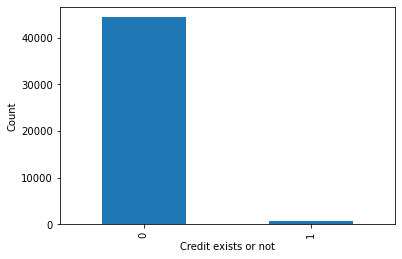

In [37]:
# Plot of Count
import matplotlib.pyplot as plt

dataframe['ifCreditExists'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Credit exists or not')

#### Scatterplot

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

[(0.0, 100.0)]

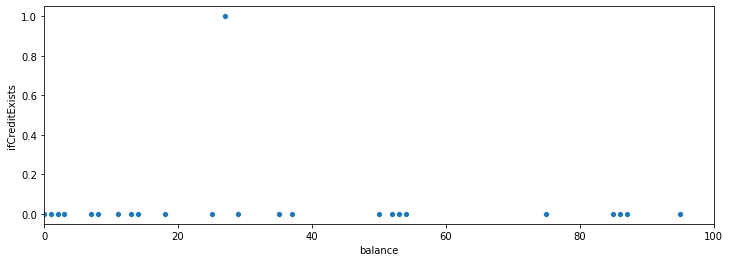

In [39]:
#balance vs if credit exists
DGraph = dataframe.sample(n = 200, random_state = 4)

fig,ax = plt.subplots(figsize=(12,4))
sns.scatterplot(DGraph['balance'],DGraph['ifCreditExists'])
ax.set(xlim=(0, 100))

[(0.0, 200.0)]

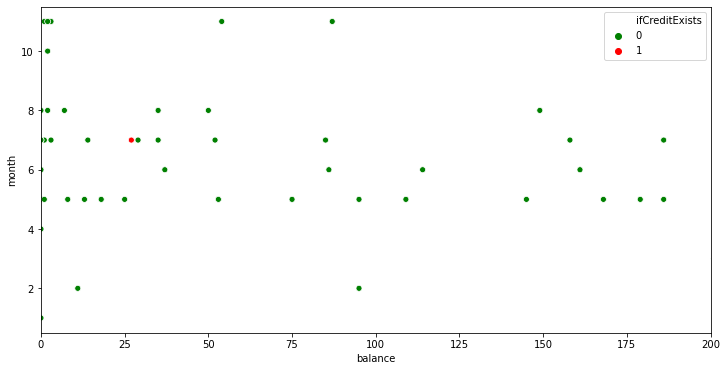

In [40]:
#balance and month compared with if credit exists

fig,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=DGraph['balance'], y=DGraph['month'], hue=DGraph['ifCreditExists'],palette=['green','red'],data=DGraph)
ax.set(xlim=(0, 200))

### Bar charts

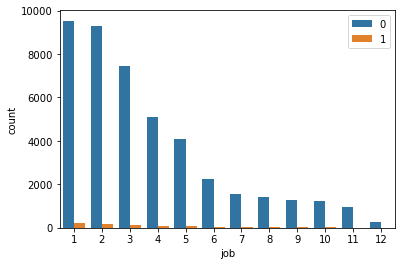

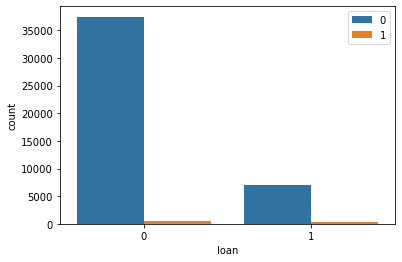

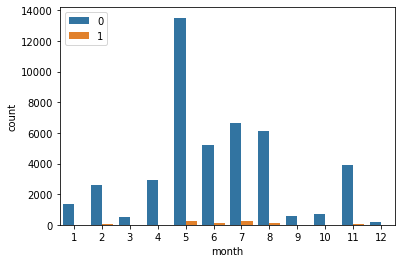

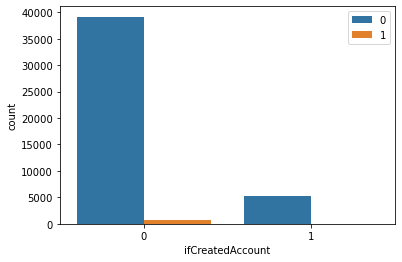

In [41]:

graphs=["job","loan","month","ifCreatedAccount"]

y1 = dataframe['ifCreditExists']
y1 = y1.values



for i in graphs:
    
    sns.countplot(x=i, hue=y1, data=dataframe)
    plt.show()

### Conclusions
+ overall most customers have no negative credit balance
+ customers with no fixed deposit account may have credit balances in their loans